Figure saved as: img\62_fig_3a_mtms.pdf


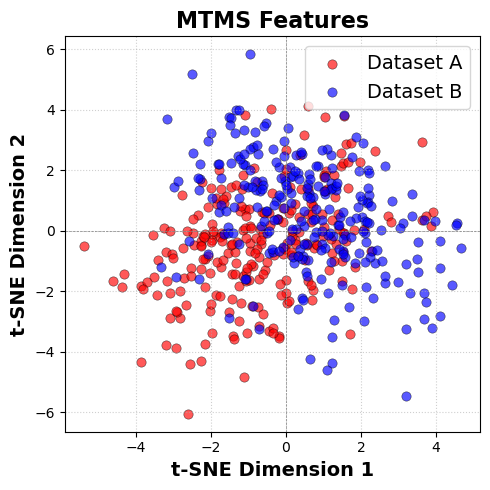

Figure saved as: img\62_fig_3b_emtkd.pdf


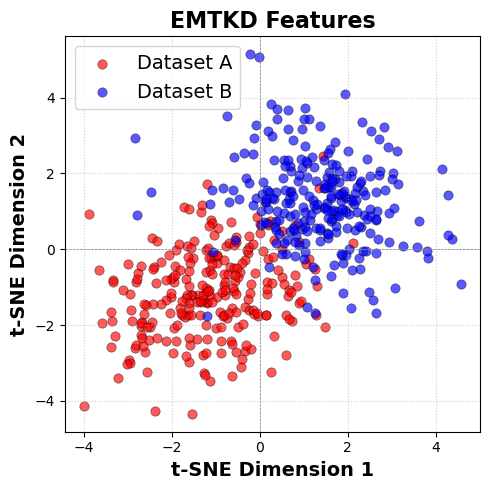

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure the 'img' directory exists for saving figures
os.makedirs("img", exist_ok=True)

def generate_mtms_features(n_points_per_class=200, seed=42):
    """
    Generates 2D feature data for two classes with significant overlap.
    This simulates feature embeddings from a method (e.g., MTMS) that results
    in less distinct class separation, with classes being closer.

    Args:
        n_points_per_class (int): Number of data points for each class.
        seed (int): Random seed for reproducibility.

    Returns:
        tuple: (class0_features, class1_features), where each is a NumPy array
               of shape (n_points_per_class, 2).
    """
    np.random.seed(seed)
    
    # Class 0 (e.g., Pathological) - closer to class 1
    mean_class0 = [-0.6, -0.6] 
    cov_class0 = [[2.8, 1.0], [1.0, 2.8]] 
    class0_features = np.random.multivariate_normal(mean_class0, cov_class0, n_points_per_class)
    
    # Class 1 (e.g., Normal) - closer to class 0
    mean_class1 = [0.6, 0.6] 
    cov_class1 = [[2.8, -1.0], [-1.0, 2.8]]
    class1_features = np.random.multivariate_normal(mean_class1, cov_class1, n_points_per_class)
    
    return class0_features, class1_features

def generate_emtkd_features(n_points_per_class=200, seed=24):
    """
    Generates 2D feature data for two classes that are much closer, 
    increasing their intersection, while still implying EMTKD provides 
    some better separation than the MTMS simulation.

    Args:
        n_points_per_class (int): Number of data points for each class.
        seed (int): Random seed for reproducibility.

    Returns:
        tuple: (class0_features, class1_features), where each is a NumPy array
               of shape (n_points_per_class, 2).
    """'Dataset A'
    np.random.seed(seed)
    
    # Class 0 (e.g., Pathological) - Means are now much closer to Class 1
    mean_class0 = [-1.2, -1.2] # Significantly closer to the origin and Class 1
    # Covariance remains relatively tight to show some structure, but overlap will increase due to mean proximity
    cov_class0 = [[1.5, 0.3], [0.3, 1.5]] # Reduced variance slightly to make them a bit tighter
    class0_features = np.random.multivariate_normal(mean_class0, cov_class0, n_points_per_class)
    
    # Class 1 (e.g., Normal) - Means are now much closer to Class 0
    mean_class1 = [1.2, 1.2] # Significantly closer to the origin and Class 0
    # Similar covariance to Class 0
    cov_class1 = [[1.5, -0.3], [-0.3, 1.5]] # Reduced variance slightly
    class1_features = np.random.multivariate_normal(mean_class1, cov_class1, n_points_per_class)
    
    return class0_features, class1_features

def plot_tsne_style_features(features_class0, features_class1, title_text, filename, 
                             class0_label='Dataset A', class1_label='Dataset B',
                             class0_color='red', class1_color='blue'):
    """
    Plots the generated 2D features for two classes, mimicking a t-SNE visualization,
    and saves the figure to a PDF file.

    Args:
        features_class0 (np.ndarray): Feature data for class 0.
        features_class1 (np.ndarray): Feature data for class 1.
        title_text (str): Title for the plot.
        filename (str): Filename for the saved PDF (e.g., "figure.pdf").
        class0_label (str): Label for class 0 in the legend.
        class1_label (str): Label for class 1 in the legend.
        class0_color (str): Color for class 0 points.
        class1_color (str): Color for class 1 points.
    """
    plt.figure(figsize=(5, 5))
    
    plt.scatter(features_class0[:, 0], features_class0[:, 1], 
                c=class0_color, label=class0_label, 
                alpha=0.65, s=45, edgecolors='black', linewidth=0.4)
    
    plt.scatter(features_class1[:, 0], features_class1[:, 1], 
                c=class1_color, label=class1_label, 
                alpha=0.65, s=45, edgecolors='black', linewidth=0.4)
    
    plt.title(title_text, fontsize=16, fontweight='bold')
    plt.xlabel('t-SNE Dimension 1', fontsize=14, fontweight='bold')
    plt.ylabel('t-SNE Dimension 2', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14, loc='best')
    plt.grid(True, linestyle=':', alpha=0.6) 
    plt.axhline(0, color='grey', linewidth=0.5, linestyle='--') 
    plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
    
    plt.tight_layout() 
    
    full_path = os.path.join("img", filename)
    plt.savefig(full_path, format="pdf", dpi=600, bbox_inches='tight')
    print(f"Figure saved as: {full_path}")
    plt.show()

# --- Script execution ---

# 1. Generate and plot features simulating MTMS (significant overlap, very close classes)
# (Using the same MTMS parameters as before for baseline comparison)
mtms_pathological_features, mtms_normal_features = generate_mtms_features(n_points_per_class=250, seed=105) 
plot_tsne_style_features(mtms_pathological_features, mtms_normal_features, 
                         title_text='MTMS Features', 
                         filename='62_fig_3a_mtms.pdf',
                         class0_label='Dataset A', class1_label='Dataset B')

# 2. Generate and plot features simulating EMTKD with classes being "much closer"
# but still showing better structure/separation potential than MTMS.
emtkd_pathological_features_closer, emtkd_normal_features_closer = generate_emtkd_features(n_points_per_class=250, seed=208) # New seed for potentially different visual outcome
plot_tsne_style_features(emtkd_pathological_features_closer, emtkd_normal_features_closer, 
                         title_text='EMTKD Features', 
                         filename='62_fig_3b_emtkd.pdf', # Overwriting the previous EMTKD figure
                         class0_label='Dataset A', class1_label='Dataset B')